# Analysis de correlation

### Author:  Ricardo Vallejo

## 1. Load Data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tit = pd.read_excel("C:\wrkOrion3\IACollege\DataProcess\Correlation\cars.xlsx")
pd.options.display.max_columns = None
tit.head(10)

,Id,type,prix,cylindree,puissance,poids,conso
0,1,Daihatsu Cuore,11600,846,32,650,5.7
1,2,Suzuki Swift 1.0 GLS,12490,993,39,790,5.8
2,3,Fiat Panda Mambo L,10450,899,29,730,6.1
3,4,VW Polo 1.4 60,17140,1390,44,955,6.5
4,5,Opel Corsa 1.2i Eco,14825,1195,33,895,6.8
5,6,Toyota Corolla,19490,1331,55,1010,7.1
6,7,Mercedes S 600,183900,5987,300,2250,18.7
7,8,Maserati Ghibli GT,92500,2789,209,1485,14.5
8,9,Opel Astra 1.6i 16V,25000,1597,74,1080,7.4
9,10,Peugeot 306 XS 108,22350,1761,74,1100,9.0


In [20]:
print('Row or individues count is:',tit.shape[0])

Row or individues count is: 31


In [21]:
print('Variables or columns count is:',tit.shape[1])

Variables or columns count is: 7


##  1.1. Variables information

In [22]:
print('Variables information:\n')
tit.info()


Variables information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         31 non-null     int64  
 1   type       31 non-null     object 
 2   prix       31 non-null     int64  
 3   cylindree  31 non-null     int64  
 4   puissance  31 non-null     int64  
 5   poids      31 non-null     int64  
 6   conso      31 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ KB


## 1.3.  Diagrames de boit

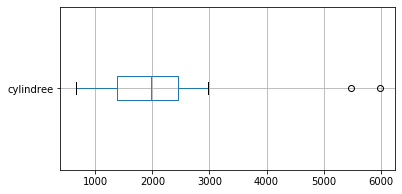

In [23]:
#Diagram de moustache
tit.boxplot(column='cylindree', figsize=(6,3), vert=False)
plt.show()

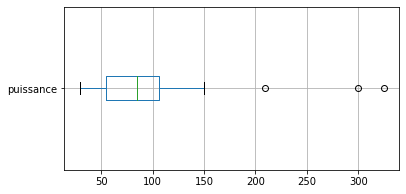

In [24]:
#Diagram de moustache
tit.boxplot(column='puissance', figsize=(6,3), vert=False)
plt.show()

## 2. Correlation Analysis - Puissance vs cylindree

In [25]:
corr = tit.corr()
print(corr)

                 Id      prix  cylindree  puissance     poids     conso
Id         1.000000  0.201202   0.238298   0.222855  0.423830  0.373601
prix       0.201202  1.000000   0.897779   0.935171  0.634961  0.891110
cylindree  0.238298  0.897779   1.000000   0.962513  0.837868  0.940992
puissance  0.222855  0.935171   0.962513   1.000000  0.779823  0.952625
poids      0.423830  0.634961   0.837868   0.779823  1.000000  0.863862
conso      0.373601  0.891110   0.940992   0.952625  0.863862  1.000000


Text(0.5, 1.0, 'Variation de puissance en relation a cylindree')

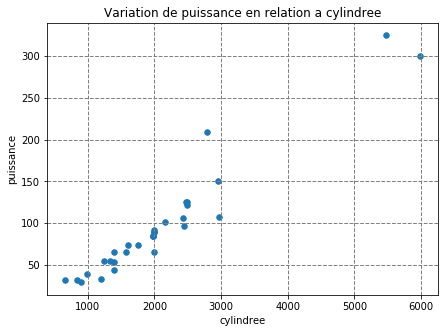

In [26]:
fig = plt.figure(figsize=(7,5))
plt.scatter(tit["cylindree"], tit["puissance"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("puissance")
plt.xlabel("cylindree")
plt.title('Variation de puissance en relation a cylindree')


In [ ]:
# Puissance vs cylindree ont plus de correlation (0,96) que poid vs prix (0,63).
# Est aussi lineal la relation entre consomme et puissance. (0,95)

In [ ]:
# Graphiquement on peut regarder a continuation que la representation lineal entre Prix et 
# poids cest nest pas valide.  Coeff. Correlation = 0,63


Text(0.5, 1.0, 'Variation de Puissance en consomme escence')

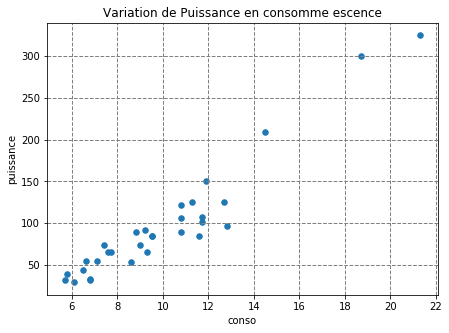

In [27]:
fig = plt.figure(figsize=(7,5))
plt.scatter(tit["conso"], tit["puissance"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("puissance")
plt.xlabel("conso")
plt.title('Variation de Puissance en consomme escence')

## 2.1. Multiple variable correlation analysis

Text(0.5, 1.0, 'Variation de Prix en poids')

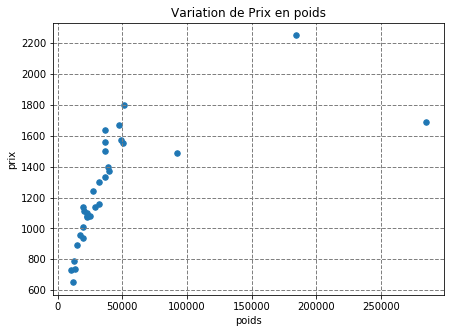

In [28]:
fig = plt.figure(figsize=(7,5))
plt.scatter(tit["prix"], tit["poids"], s=30)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("prix")
plt.xlabel("poids")
plt.title('Variation de Prix en poids')

In [ ]:
# Cest evident que la variable poids, n'as pas relation lineal avec des autres variables, 
# ses individus sont disperses.  Dans le histogram respective on confirme plus la dispersion 
# de donnes de la variable poids.  Aussi les coefficient de correlation sont les plus bas (0,63).



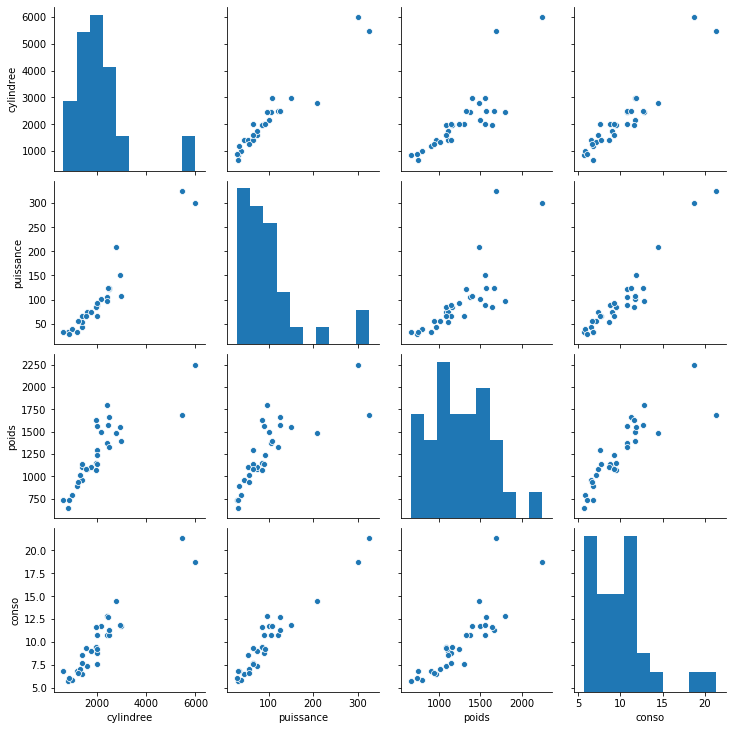

In [29]:
import seaborn as sns

sns.pairplot(tit[['cylindree', 'puissance', 'poids', 'conso']])
plt.show()

## Matrice de correlation

In [30]:
# To show correlation between variables, diagonal values with correlation == 1 are 
# good correlation values.

matrice_correlation = tit.corr().round(2)
print(matrice_correlation)

             Id  prix  cylindree  puissance  poids  conso
Id         1.00  0.20       0.24       0.22   0.42   0.37
prix       0.20  1.00       0.90       0.94   0.63   0.89
cylindree  0.24  0.90       1.00       0.96   0.84   0.94
puissance  0.22  0.94       0.96       1.00   0.78   0.95
poids      0.42  0.63       0.84       0.78   1.00   0.86
conso      0.37  0.89       0.94       0.95   0.86   1.00


## 2.2.  Heat Map

## seaborn sns Methode.

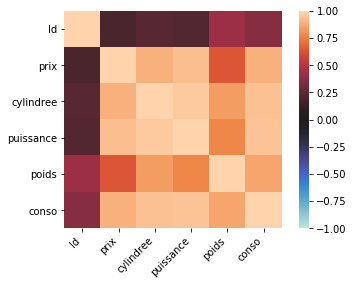

In [31]:
corr = tit.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## stats Model Methode.

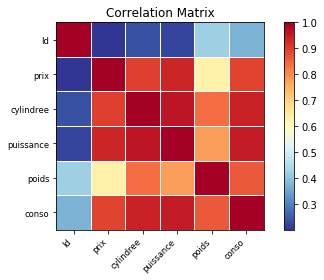

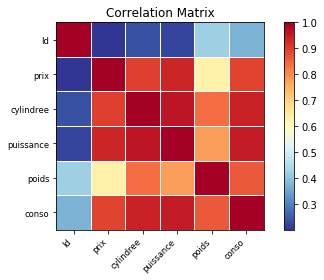

In [32]:
import statsmodels.api as sm

sm.graphics.plot_corr(corr, xnames=list(corr.columns))

# 3. Regression Lineal

## 3.1.  Methode 1 - sklearn

In [33]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

x1 = np.array(tit["cylindree"]).reshape((-1,1))
y1 = tit['puissance']

mymodel = LinearRegression()
results = mymodel.fit(x1,y1)

print("Coeficient determination: \n", results.score(x1, y1))
print("Intercept: \n", results.intercept_)
print("Slope: \n", results.coef_)

Coeficient determination: 
 0.9264320565625962
Intercept: 
 -24.163623713709967
Slope: 
 [0.05791742]


In [ ]:
 # y = mx + b ==> y = Slope * X + Intercept ==> y = 0.0579x-24.163

## Model Graphique verification

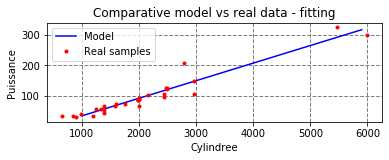

In [16]:
def Yy(m, b, x):
    return m*x + b;

Xmodel = range(1000,6000, 100)
Ymodel = Yy(results.coef_, results.intercept_,  Xmodel)


plt.figure()
plt.subplot(211)
plt.plot(Xmodel, Yy(results.coef_, results.intercept_,  Xmodel), 'b-', label='Model')
plt.plot(tit['cylindree'], tit['puissance'], 'r.', label='Real samples')
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Puissance")
plt.xlabel("Cylindree")
plt.title('Comparative model vs real data - fitting')
plt.legend(loc='best')
plt.show()


## 3.2. Methode 2 - statsmodels

In [17]:
from statsmodels.formula.api import ols

results = ols('puissance ~ cylindree', data=tit).fit()

print("Results summary: \n", results.summary())

Results summary: 
                             OLS Regression Results                            
Dep. Variable:              puissance   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     365.2
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           5.62e-18
Time:                        00:01:59   Log-Likelihood:                -134.44
No. Observations:                  31   AIC:                             272.9
Df Residuals:                      29   BIC:                             275.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -24.1636      7.216 

In [18]:
# The result are the same y = 0.0579x - 24.163